# DataFrame Creation <a id='DataFrame_Creation' ></a>

# 1. Contents <a id='1._Contents'></a>
* [DataFrame Creation](#DataFrame_Creation)
  * [1. Contents](#1._Contents)
  * [2. Introduction](#2._Introduction)
  * [3. Create DataFrame](#3._Create_DataFrame)

# 2. Introduction <a id='2._Introduction'></a>
For my third capstone project, I will be analyzing a dataset of **19,320 bloggers** and their [blogger.com](http://www.blogger.com) blogs to determine whether there is a difference in the language used between *male and female users*. Throughout the course of my project, I will most likely discover other insights about my dataset, as it includes more features than just gender. The results of this project could be important, not only to satisfy my personal curiosity, but to researchers in fields involving interpersonal communication. Many inconclusive studies have been conducted on the amount of words women and men use in conversation, yet the amount of studies on differences in vocabulary is far less. Current research has concluded that men speak in more abstract terms, while women are more focused on details. The results of my projects could be supplemental to this research. 

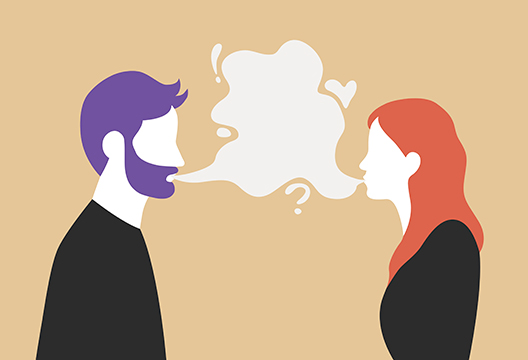

There is a popular stereotype that women use more words than men. One common variation of this asserts that **women use 20,000 words a day while men use 7,000**, yet there is **no scientific basis** for this claim. Although subsequent studies have found negligible differences in the amount of words men and women speak per day, far less studies have been conducted on the gender differences in vernacular. In general, these studies have found that **men speak in terms of the big picture, while women tend to focus on specifics**. This was done by assigning scores of abstractness to specific words and measuring the frequency of these words in the speech and text of men and women. Besides just abstractness, I will seek some other form of NLP analyses that may highlight the differences between the words that males and females use. The key data source will come from the **Blog Authorship Corpus**, collected by Schler, Koppel, Argamon, and Pennebaker (2006).

After making sure the dataset is clean and workable, I will analyze it for correlations between *age, gender, and text used*. This will potentially include variables such as *word abstractness, sentiment analysis, or maybe even word length*. I will then compare the strength of correlations between these variables and gender/age to see what combinations of features result in the most accurate prediction of the blogger’s identity.

# 3. Create DataFrame <a id='3._Create_DataFrame'></a>
The original dataset provided comes in the form of a large folder containing **19,320 xml files**, with each file containing the *user ID, gender, age, industry, and astrological sign* of a blogger in the filename, while the file itself contains text from their blogs. 

<img src="OG%20folder.JPG" align="left"/>

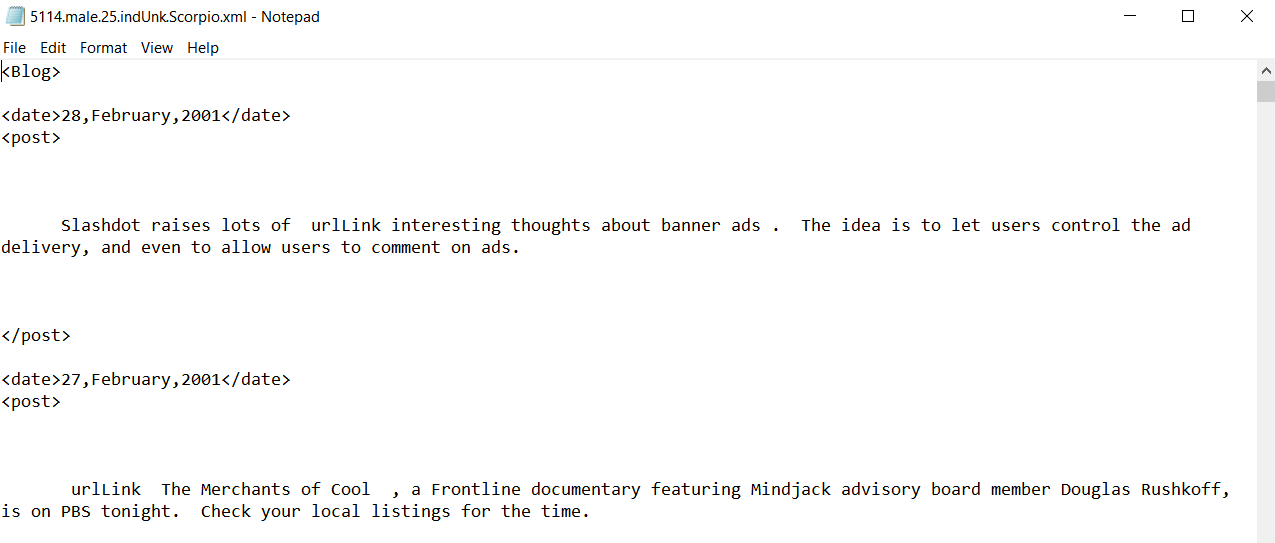

As we can see, the files themselves contain some extraneous text and whitespace. I will need to create my own DataFrame by iterating over each file, extracting only the pertinent features and injecting them into a dictionary, finally converting that dictionary into a **pandas DataFrame**.

In [1]:
import os

# The file where the folder is located
os.chdir('C:\\Users\\yctaa\\Desktop\\Data Science\\Springboard\\Springboard Projects\\Battle of the Sexes - Blogger Edition\\blogs')
os.getcwd()

'C:\\Users\\yctaa\\Desktop\\Data Science\\Springboard\\Springboard Projects\\Battle of the Sexes - Blogger Edition\\blogs'

In [2]:
import re
import pandas as pd
from tqdm import tqdm

keys = {'id','gender','age','industry','sign','date','blog'}
dict = {k:[] for k in keys}

def extract_features_into_dict(filename):
    "This extracts only the essential information from each file and puts them into a dictionary"
    with open(filename,errors='ignore') as file:
        text = re.sub('<.*?>', '', file.read())
        dates = re.findall(r'(\d{2},\D{3,15},\d{4})', text)
        blogs_with_whitespace = re.sub(r'([0-9-._]+,[\w]+,[0-9]*)', '', text)
        blogs = [blog.strip() for blog in blogs_with_whitespace.splitlines() if re.search('[a-zA-Z]', blog)]
        for date, blog in zip(dates, blogs):
            dict['id'].append(filename.split('.')[0])
            dict['gender'].append(filename.split('.')[1])
            dict['age'].append(filename.split('.')[2])
            dict['industry'].append(filename.split('.')[3])
            dict['sign'].append(filename.split('.')[4])
            dict['date'].append(date)
            dict['blog'].append(blog)

for filename in tqdm(os.listdir()):
    extract_features_into_dict(filename)

# Convert dictionary into DataFrame
data = pd.DataFrame.from_dict(dict)[['id','gender','age','industry','sign','date','blog']]
data.head()

100%|████████████████████████████████████████████████████████████████████████████| 19320/19320 [06:39<00:00, 48.41it/s]


,id,gender,age,industry,sign,date,blog
0,1000331,female,37,indUnk,Leo,"31,May,2004","Well, everyone got up and going this morning. ..."
1,1000331,female,37,indUnk,Leo,"29,May,2004",My four-year old never stops talking. She'll ...
2,1000331,female,37,indUnk,Leo,"28,May,2004","Actually it's not raining yet, but I bought 15..."
3,1000331,female,37,indUnk,Leo,"28,May,2004",Ha! Just set up my RSS feed - that is so easy!...
4,1000331,female,37,indUnk,Leo,"28,May,2004","Oh, which just reminded me, we were talking ab..."


In [3]:
data.shape

(677596, 7)

The Blog Authorship Corpus states that there are a total of **681,288** posts in the dataset. I was able to capture **677,596**, which means we lost

In [4]:
681288 - 677596

3692

**3692** blogs in the processing of data. This is equal to

In [5]:
3692 / 681288

0.0054191472622444545

a **~0.5%** loss in data, which is not too bad. As a result, we will move on to the next step of data analysis. Before that, I will save my new dataframe as a *csv file* on my own machine.

In [6]:
## Save DataFrame
os.chdir('C:\\Users\\yctaa\\Desktop\\Data Science\\Springboard\\Springboard Projects\\Battle of the Sexes - Blogger Edition')
data.to_csv('data.csv')